In [136]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv


In [137]:
import math
import numpy as np
import pandas as pd
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import  Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose


In [138]:
data = pd.read_csv("../input/tesla-stock-price/Tesla.csv - Tesla.csv.csv",index_col='Date', parse_dates=True)

In [139]:
data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


In [140]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


# ***we will work on closing price ***

In [141]:
close_data = data.iloc[:, 3:4]

In [142]:
close_data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2017-03-13,246.169998
2017-03-14,258.000000
2017-03-15,255.729996


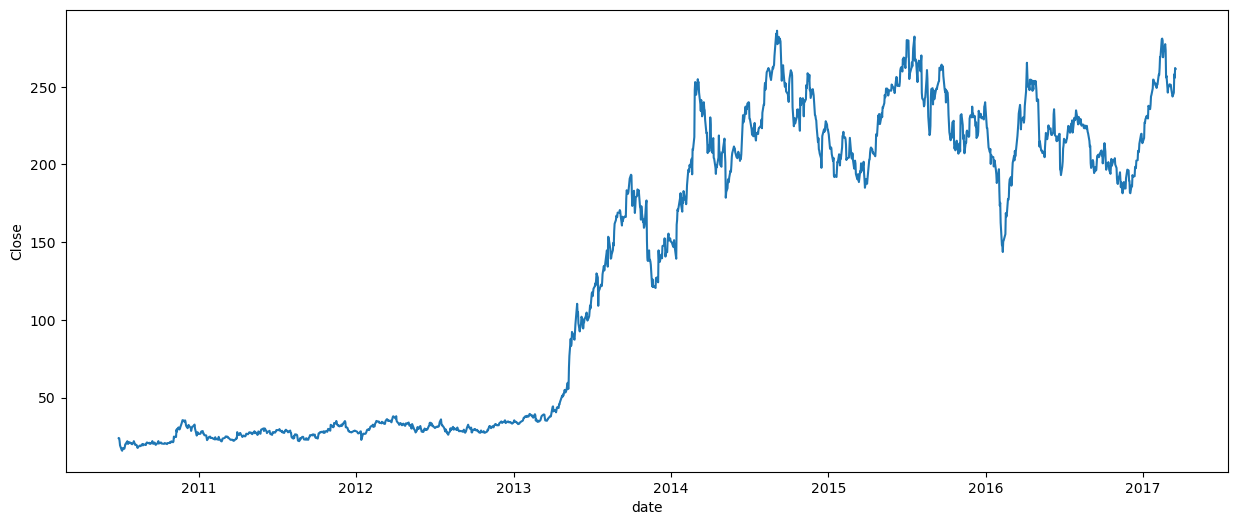

In [143]:
# Plot the data
plt.plot(close_data)
plt.xlabel('date')
plt.ylabel('Close')
plt.show()

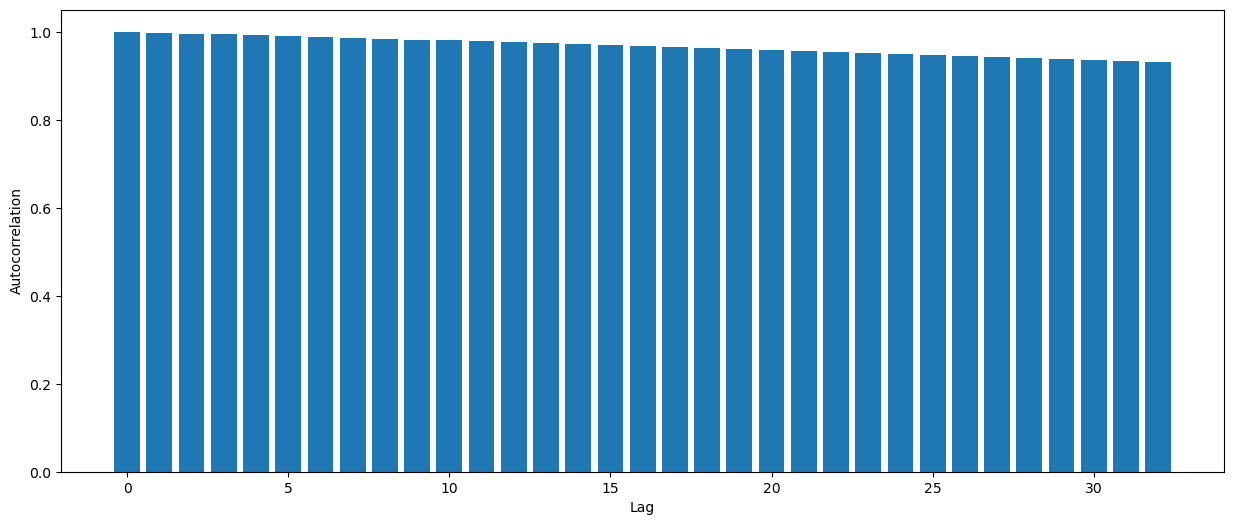

In [144]:
# Calculate the autocorrelation at different lags
autocorrelation = acf(close_data)

# Create a bar plot of the autocorrelation
plt.bar(range(len(autocorrelation)), autocorrelation)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

****strong positive correlation between observations at different points in time. This could indicate that close  data has a strong trend ****

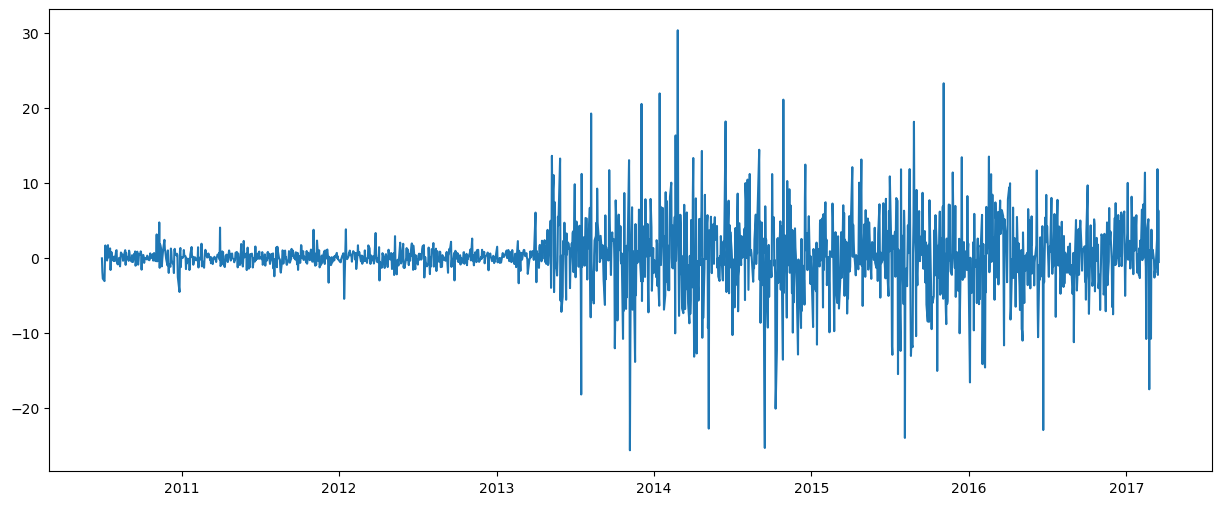

In [145]:
# Detrend the data using differencing
detrended_data = close_data.diff().dropna()

# Plot the detrended data
plt.plot(detrended_data)
plt.show()

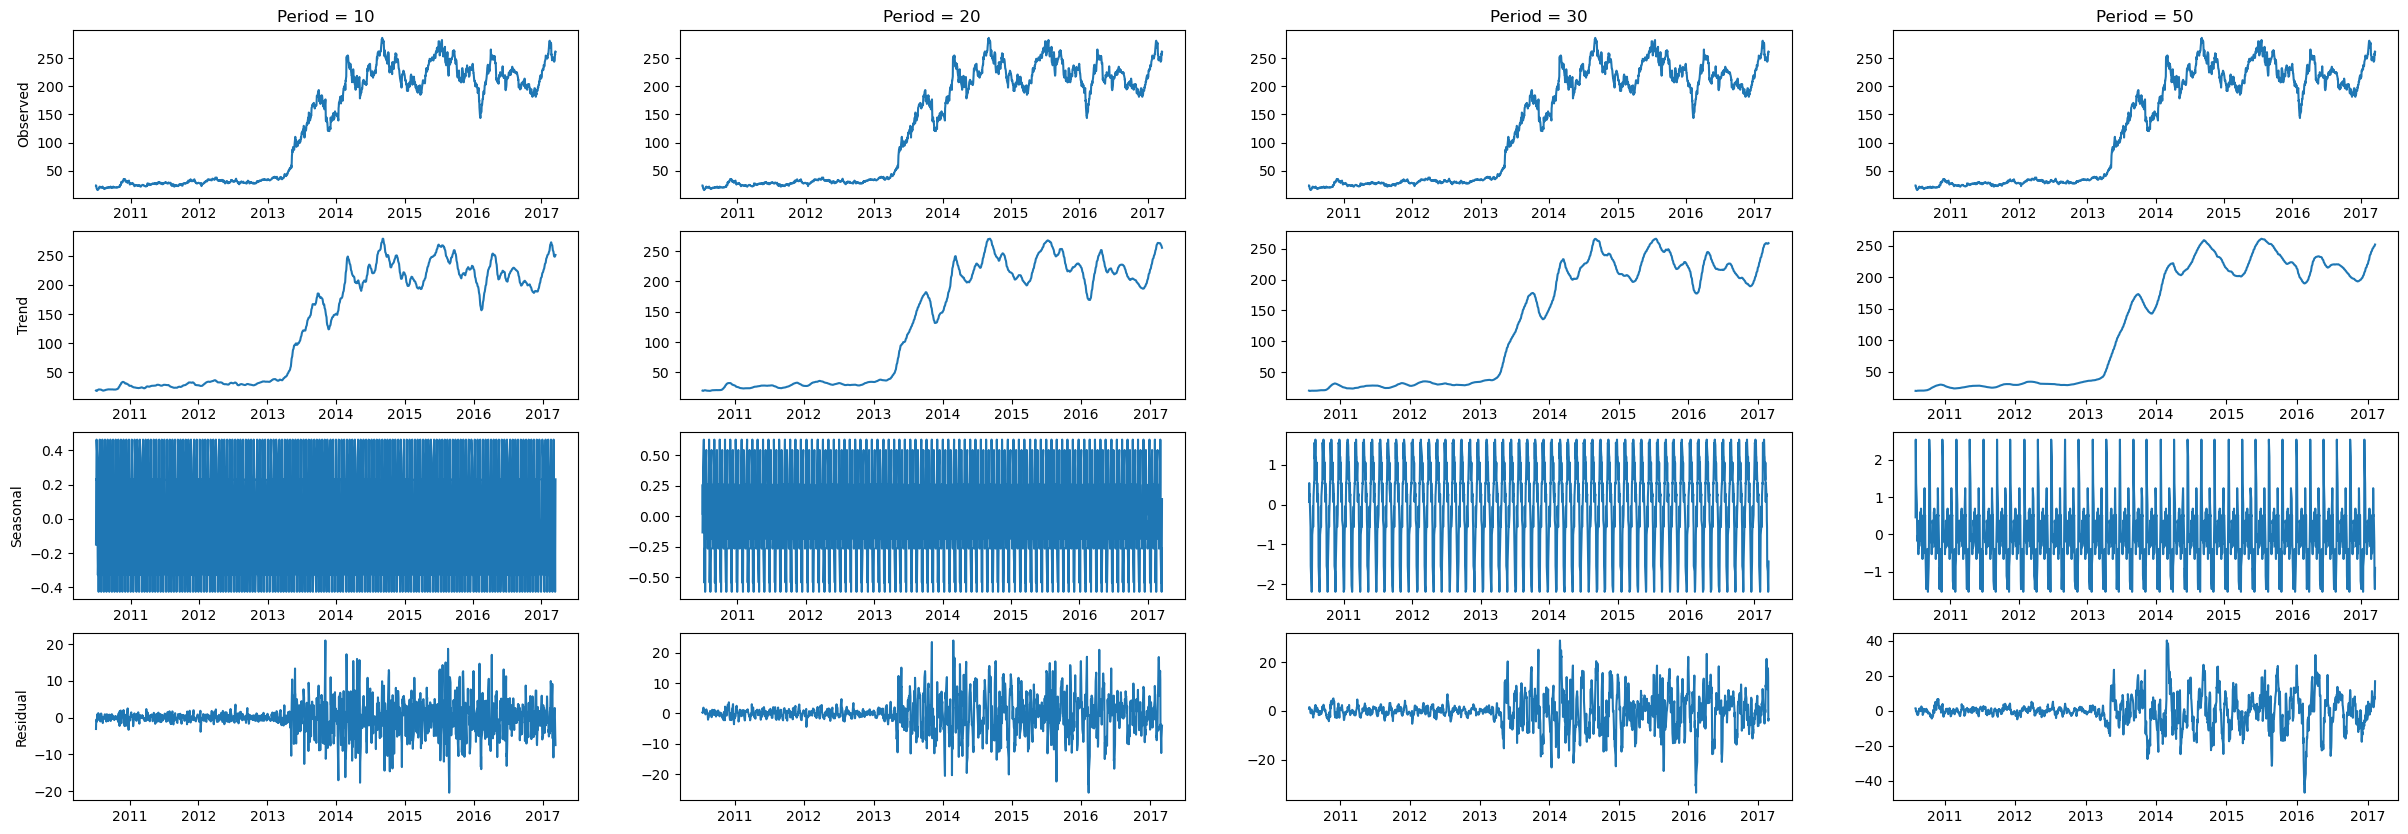

In [146]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Create a list of period values to use
periods = [10, 20, 30, 50]

# Create a figure with 4 subplots arranged in a single row
fig, axes = plt.subplots(nrows=4, ncols=len(periods), figsize=(30, 10))

# Loop over the period values
for i, period in enumerate(periods):
    # Decompose the time series data into trend, seasonal, and residual components
    decomposition = seasonal_decompose(close_data, period=period)
    
    # Plot the observed data on the first row of subplots
    axes[0, i].plot(decomposition.observed)
    axes[0, i].set_title(f'Period = {period}')
    
    # Plot the trend component on the second row of subplots
    axes[1, i].plot(decomposition.trend)
    
    # Plot the seasonal component on the third row of subplots
    axes[2, i].plot(decomposition.seasonal)
    
    # Plot the residual component on the fourth row of subplots
    axes[3, i].plot(decomposition.resid)

# Set the titles for each row of subplots
axes[0, 0].set_ylabel('Observed')
axes[1, 0].set_ylabel('Trend')
axes[2, 0].set_ylabel('Seasonal')
axes[3, 0].set_ylabel('Residual')

# Display the figure
plt.show()


In [308]:
def arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(yhat)
    mse=mean_squared_error(test, predictions)
    return mse,test,predictions,model_fit

In [309]:
ariama_data=close_data.iloc[:close_data.shape[0]-90,:]
mse,test, arima_predictions,arima_model = arima_model(ariama_data['Close'],(1,1,1))




In [310]:
mse

3486.384417948588

# ARIMA predection for the next 60 days

In [311]:
def arima_predict(res_set,arima_model,steps):
    predictions = list(arima_model.forecast(steps=steps))
    error = mean_squared_error(res_set, predictions)
    return predictions,error


In [312]:
res_set=close_data.iloc[-90:,:]

In [313]:
predections,mse_60step=arima_predict(res_set,arima_model,90)

In [314]:
mse_60step

3479.1475247692692

# ARIMA & LSTM hybrid model 

In [315]:
n_steps=20
train_size = int(len(ariama_data) * 0.66)
l=ariama_data[:train_size]
l=l[-n_steps+1:]
l=l['Close']
print(len(l))
l=l.tolist()
arp=l+arima_predictions


19


In [316]:
# Prepare data for LSTM model
def prepare_data(x, y, n_steps):
    X, Y = [], []
    for i in range(len(x) - n_steps):
        seq_x = x[i:i+n_steps]
        seq_y = y[i]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X), np.array(Y)



X_train, y_train = prepare_data(arp,test,n_steps)

In [317]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ReduceLROnPlateau
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

# Define LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu',return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(64))

model.add(Dense(70))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')




In [318]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=6, verbose=1,min_lr=1e-9)

In [323]:
# Fit LSTM model
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
17/17 [==============================] - 1s 31ms/step - loss: 593.6095
Epoch 2/30
17/17 [==============================] - 1s 33ms/step - loss: 594.0284
Epoch 3/30
17/17 [==============================] - 1s 32ms/step - loss: 593.9908
Epoch 4/30
17/17 [==============================] - 1s 32ms/step - loss: 594.3741
Epoch 5/30
17/17 [==============================] - 1s 32ms/step - loss: 597.3879
Epoch 6/30
17/17 [==============================] - 1s 32ms/step - loss: 592.0539
Epoch 7/30
17/17 [==============================] - 1s 31ms/step - loss: 594.7065
Epoch 8/30
17/17 [==============================] - 1s 31ms/step - loss: 598.0158
Epoch 9/30
17/17 [==============================] - 1s 32ms/step - loss: 597.0328
Epoch 10/30
17/17 [==============================] - 1s 32ms/step - loss: 593.6929
Epoch 11/30
17/17 [==============================] - 1s 32ms/step - loss: 593.2853
Epoch 12/30
17/17 [==============================] - 1s 32ms/step - loss: 593.5531
Epoch 13/30
1

In [320]:

# Make predictions with LSTM model
history = arp[-n_steps:]
lstm_predictions = []
for i in range(len(predections)):
    x_input = np.array(history[-n_steps:])
    x_input = x_input.reshape((1, n_steps, n_features))
    x_input = x_input.astype('float32')
    yhat = model.predict(x_input,verbose=0)[0][0]
    lstm_predictions.append(yhat)
    history.append(predections[i])


In [321]:
error = mean_squared_error(res_set, lstm_predictions)

In [322]:
error

949.5755207485744